#Double 7's Intra (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY makes an intraday X-day low, buy.
    3. If the SPY makes an intraday X-day high, sell your long position.
    
    (optimize the number of days)

In [1]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [2]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# set size of inline plots
matplotlib.rcParams['figure.figsize'] = [14, 10]

Some global data

In [4]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 100000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(1970, 12, 1)
#start = datetime.datetime(2015, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [5]:
periods = range(3, 16)
periods = [str(period) for period in periods]

Run Strategy

In [6]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,5.82,5.44,7.92,7.41,8.39,8.02,7.15,7.07,7.14,6.90,6.99,6.47,6.46
max_closed_out_drawdown,-24.60,-22.09,-17.80,-19.50,-16.02,-15.67,-18.60,-17.83,-19.21,-17.35,-17.36,-18.45,-17.99
drawdown_annualized_return,-4.23,-4.06,-2.25,-2.63,-1.91,-1.95,-2.60,-2.52,-2.69,-2.51,-2.48,-2.85,-2.78
drawdown_recovery,-0.91,-0.97,-0.80,-1.28,-0.59,-0.43,-0.25,-0.25,-1.55,-0.24,-1.62,-1.62,-1.62
best_month,11.48,11.01,10.57,11.18,12.19,12.29,13.45,13.73,14.14,14.37,14.36,10.70,10.75
worst_month,-15.54,-14.98,-14.41,-14.41,-13.45,-14.20,-16.30,-16.30,-16.30,-16.30,-16.30,-14.49,-14.48
sharpe_ratio,0.52,0.50,0.70,0.66,0.74,0.71,0.65,0.64,0.65,0.63,0.64,0.61,0.61
sortino_ratio,0.57,0.53,0.73,0.67,0.73,0.69,0.62,0.61,0.61,0.58,0.58,0.54,0.53
monthly_std,2.65,2.50,2.47,2.42,2.43,2.43,2.52,2.56,2.57,2.59,2.52,2.43,2.45
pct_time_in_market,60.36,55.49,52.89,50.35,48.67,47.27,46.11,45.24,44.46,43.61,41.50,40.09,38.76


Bar graphs

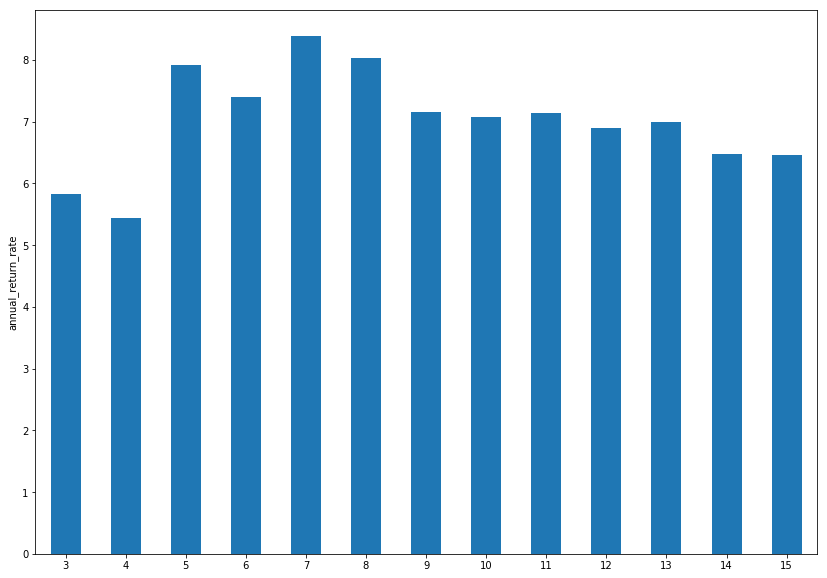

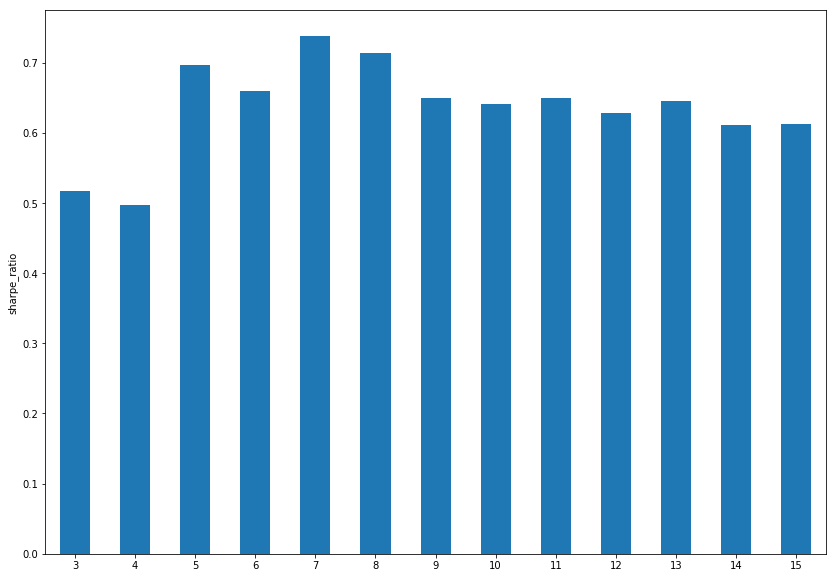

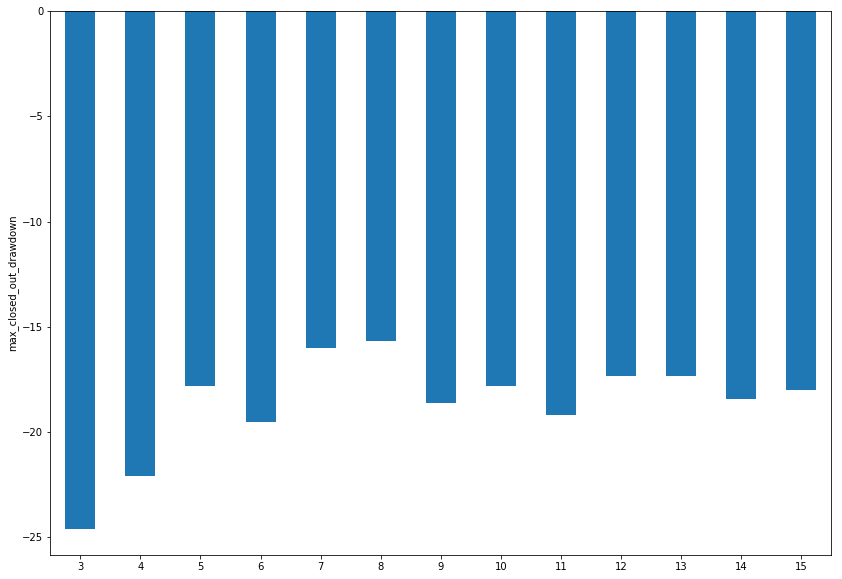

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1993-11-12 00:00:00 BUY  3451 SPY @ 28.98
2019-05-15 00:00:00 SELL 3451 SPY @ 285.06


Equity curve

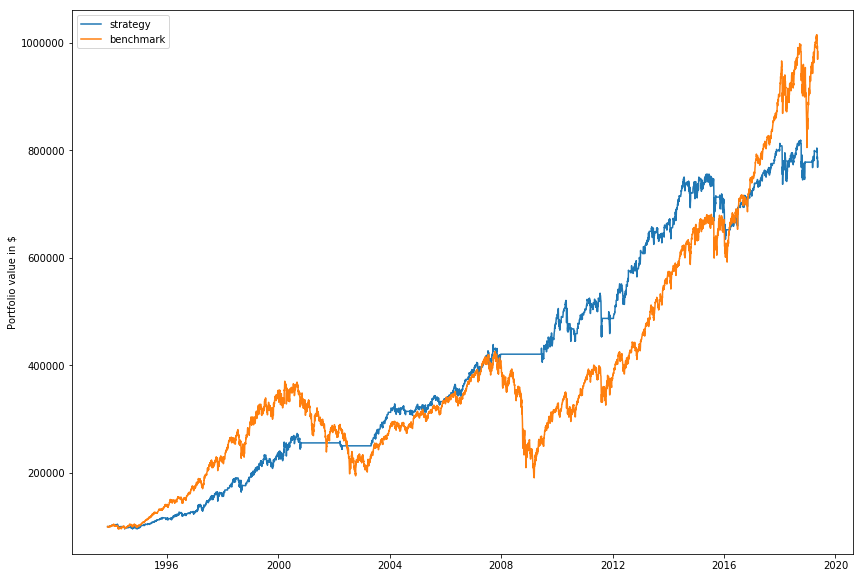

In [10]:
pf.plot_equity_curve(strategies['7'].dbal, benchmark=benchmark.dbal)